### Enrique Mejía Fontanot
Análisis de la base de Carpetas de Investigación FGJ como respuesta al apartado A del examen.

#### Estructura:

1. Cargar bibliotecas necesarias
2. Leer datos
3. Respuestas a preguntas del examen

    3.1 ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario
hacerlas, sólo describe la prueba y lo que te dicecada una.

    3.2 Identifica los delitos que van al alza y a la baja en la CDMX (ten cuidado con los delitos
con pocas ocurrencias).

    3.3 ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?¿Por qué crees que sea
esto?

    3.4 ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la
semana, quincenas) en la CDMX? ¿A qué crees que sedeba?

    3.5 ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que
suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

    3.6 Diseña un indicador que mida el nivel de “inseguridad”. Genéralo al nivel de
desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.). Analiza los
resultados ¿Encontraste algún patrón interesante? ¿Qué decisiones se podrían tomar
con el indicador?

#### Notas

Es necesario cargar el archivo .csv de carpetas de investiación si es la primera vez que se ejecuta el script ya que este archivo no se sube al repositorio de git. Se pretende que el código sea reproducible, claro y entendible. Los comentarios en el código sirven el propósito de describir el código que les sigue. El texto en formato markdown pretende ofrecer la respuesta de todas las preguntas a partir de la ejecución del código y del análisis de los resultados de este manera secuencial. Cada pregunta va añadiendo información que es utilizada por los análisis posteriores.


1. Cargar bibliotecas necesarias

In [47]:
## para manipular datos  
import pandas as pd  
## para manipular datos geograficos
import geopandas as gd
## para manupular datos georáficos
from shapely.geometry import Point
from shapely.ops import cascaded_union
from shapely.ops import Polygon
## para graficar
import seaborn as sns 
## para graficar
import matplotlib.pyplot as plt 
## para manejo de fechas
from datetime import datetime, date, timedelta

2. Leer datos

In [2]:
#### leer datos desde archivo csv descargado del portal de datos abiertos de la ADIP.
df = pd.read_csv('../input/carpetas_completa_junio_2021.csv',low_memory=False, encoding='utf-8')

Revisar dimensiones del dataframe leído.

In [3]:
## revisar dimensiones del df
df.shape

(1248924, 19)

In [4]:
## revisar tipos de variables
df.dtypes

ao_hechos               float64
mes_hechos               object
fecha_hechos             object
ao_inicio                 int64
mes_inicio               object
fecha_inicio             object
delito                   object
fiscalia                 object
agencia                  object
unidad_investigacion     object
categoria_delito         object
calle_hechos             object
calle_hechos2            object
colonia_hechos           object
alcaldia_hechos          object
competencia              object
longitud                float64
latitud                 float64
tempo                   float64
dtype: object

In [5]:
## revisar df 
df.tail()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
1248919,2021.0,Junio,2021-06-29 17:00:00,2021,Junio,2021-06-30 23:32:31,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN MILPA...,MIL-2,UI-3SD,DELITO DE BAJO IMPACTO,OAXTEPEC,NaN,SAN MARCOS (SANTA ANA TLACOTENCO),MILPA ALTA,FUERO COMUN,-98.992460,19.168371,NaN
1248920,2021.0,Junio,2021-06-04 19:00:00,2021,Junio,2021-06-30 23:36:45,ROBO DE ACCESORIOS DE AUTO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAUH...,CUH-7,UI-3SD,DELITO DE BAJO IMPACTO,AVENIDA MEXICO,TEOTIHUACAN,HIPÓDROMO,CUAUHTEMOC,FUERO COMUN,-99.168311,19.412001,NaN
1248921,2021.0,Junio,2021-06-30 19:40:00,2021,Junio,2021-06-30 23:37:12,AMENAZAS,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAC...,IZC-2,UI-3SD,DELITO DE BAJO IMPACTO,CUATRO,NaN,AGRÍCOLA PANTITLAN,IZTACALCO,FUERO COMUN,-99.061716,19.419028,NaN
1248922,2021.0,Mayo,2021-05-16 21:08:00,2021,Junio,2021-06-30 23:45:57,DAÑO EN PROPIEDAD AJENA INTENCIONAL,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN CUAUH...,CUH-7,UI-3SD,DELITO DE BAJO IMPACTO,ALVARO OBREGON,NaN,ROMA NORTE,CUAUHTEMOC,FUERO COMUN,-99.158994,19.418615,NaN
1248923,2021.0,Junio,2021-06-29 17:00:00,2021,Junio,2021-06-30 23:52:34,LESIONES INTENCIONALES POR ARMA BLANCA,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAP...,IZP-8,UI-3CD,DELITO DE BAJO IMPACTO,REFORMA # 100,NaN,LOMAS DE SAN LORENZO,IZTAPALAPA,FUERO COMUN,-99.069557,19.321406,NaN


3. Respuestas a preguntas

3.1 ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario
hacerlas, sólo describe la prueba y lo que te dice cada una.

Es necesario verificar que la información cumple con los requisitos necesarios para poder extraer valor de ella. Para esto es necesario primero definir qué es lo que queremos entender a través de estos datos. En este ejercicio, las preguntas ya están dadas por lo nos basamos en ellas para definir las pruebas que aseguren la calidad de los datos. Revisamos los siguientes criterios de precisión y describimos las pruebas correspondientes:

- precisión - Para establecer una respuesta a partir de los datos, es necesario que estén libres de errores. Por ejemplo, si hubiera errores en la codificación de los delitos, o en las latitudes y longitudes de los mismos, no podríamos realizar un análisis preciso de los mismos a partir de estas variables. Cualquier conclusión estaría sesgada por estos errores y no sería reproducible con otras aproximaciones al mismo fenómeno. Si fuera posible se debería de ir al nacimiento de los datos para asegurarnos que toda la información capturada termine en el portal de datos abiertos sin ningún error. Sin embargo no somos dueños de la información por lo que la mejor prueba que podemos hacer es un análisis histórico de la precisión de cada variable. De esta manera podemos detectar errores en el momento en que sean introducidos a la base durante alguna de sus actualizaciones mensuales.

- integridad (_completeness_) - Se refiere a que los datos no deberían de tener valores nulos en ninguna variable, y deberían de tener todos los atributos necesarios para el análisis. Esto se puede probar haciendo un conteo de valores nulos, para calcular la proporción de valores nulos por variable. También se puede hacer un análisis de tendencia para detectar anomalías en cuanto a la cantidad de valore nulos generados por fecha, para detectar la introducción de una variable no disponible anteriormente.

- consistencia - Los datos deben de mantener el formato esperado de cada variable dada su naturaleza y no debe haber cambios en formatos ni en los valores de los registros. La primera prueba que se debe hacer es una revisión de los formatos y valores de cada variable. Esto se puede hacer con los comandos de describe para variables numéricas y enteras y de value_counts para las categóricas y de texto. La segunda prueba es la de consistencia histórica. Con cada entrega mensual, se debe verificar si se están introduciendo cambios de formatos o de los valores en algún registro. Debido a la naturaleza cambiante de las carpetas de investigación, mismas que pueden ser actualizadas aún después de haber sido publicadas en el portal de datos abiertos, es necesario verificar de manera histórica la consistencia de la información.

- validez -  Los datos deben cumplir los requisitos para el uso que se les quiere dar. Esto incluye que las variables de fecha en realidad capturen una fecha en un formato adecuado, que una variable de correo electrónico esté validada como realmente existente y otros ejemplos similares.  Es decir que si queremos analizar los delitos que suceden en la Ciudad de México (CDMX), debemos de asegurarnos que cada registro es una observación válida de este fenómeno y que cada variable está capturada de acuerdo a su naturaleza. Este punto trae a la luz un problema fundamental de esta base de datos: se trata solamente de los delitos que son denunciados directamente o investigados por la Fiscalía General de Justicia de la Ciudad de México (FGJ). Existe la llamada cifra negra que corresponde a la cantidad de delitos que no son denunciados o no son investigados por las autoridades. Se puede hacer una comparación con la Encuesta nacional de victimización y percepción sobre seguridad pública (ENVIPE) que mide a través de una muestra representativa de habitantes de la CDMX la cantidad de personas que han sido víctimas de delitos en el último año. En el mundo ideal, se deberían de denunicar la misma cantidad de delitos que son cometidos en la ciudad.

- los datos deben ser oportunos - Este criterio se encarga de medir qué tan oportunamente están disponibles los datos desde que son creados hasta que son publicados. Para probarlo, debemos aprovechar que contamos con la fecha de inicio de la carpeta (fecha_inicio) y la fecha en que se reportaron los hechos (fecha_hechos). Para cada registro, la diferencia entre estas dos variables nos da una parte del tiempo que toma en estar disponible desde que sucede el hecho. A esta cantidad debemos sumar el tiempo que falta hasta la siguiente publicación mensual en el portal de datos abiertos. Los datos se publican alrededor del día 10 de cada mes, y contienen la actualizaión correspondiente al mes completo anterior. Por lo que debemos sumar los días faltantes del mes más 10 días para obtener un estimado de qué tan oportuno es cada registro.

- unicidad - Se refiere a que no existan registros duplicados del mismo hecho en la base. Para probarlo podemos comparar la dimensión completa de la base contra la cantidad de registros únicos. Esto nos dirá si existe algún duplicado que tenga  los mismos valores en todas las variables. Sin embargo, pueden existir duplicados que tengan algún valor ligeramente diferente y estos escaparían a la detección de esta prueba. Se puede hacer una prueba más específica que compare a los registros por alguna medida de similitud. Sin embargo esto cosntituye un problema que se podría complejizar bastante ya que incluso se podría ajustar un modelo estadístico para estimar qué tanto es un duplicado cada registro.

3.2 Identifica los delitos que van al alza y a la baja en la CDMX (ten cuidado con los delitos
con pocas ocurrencias).

Lo primero que hacemos es separar la fecha y la hora de los hechos en dos variables separadas a las que les damos el nombre de "variable"\_clean. Es relevante notar que mantendremos esta notación de aquí en adelantcon cualquier modificación similar. El motivo es conservar siempre una copia original de lnformación, en caso de requerir algún nuevo análisis.

In [6]:
## separar fecha y hora de hechos/inicio que vienen pegados por un espacio
# fecha de hechos
df['fecha_hechos_clean'] = df['fecha_hechos'].str.split(' ').str.get(0)
df['hora_hechos_clean'] = df['fecha_hechos'].str.split(' ').str.get(1)

# fecha de inicio
df['fecha_inicio_clean'] = df['fecha_inicio'].str.split(' ').str.get(0)
df['hora_inicio_clean'] = df['fecha_inicio'].str.split(' ').str.get(1)

Ahora pasamos las variables de fecha al tipo datetime.

In [7]:
## pasar fecha_hechos_clean a tipo datetime
df['fecha_hechos_clean'] = pd.to_datetime(df['fecha_hechos_clean'])
df['fecha_inicio_clean'] = pd.to_datetime(df['fecha_inicio_clean'])

In [8]:
## pasar fecha_hechos_clean a tipo date
df['fecha_hechos_clean'] = df['fecha_hechos_clean'].apply(lambda x: x.date())
df['fecha_inicio_clean'] = df['fecha_inicio_clean'].apply(lambda x: x.date())

Ya que tenemos las fechas en el formato adecuado, podemos hacer los primeros análisis de las tendencias de los delitos. 

Tenemos que comenzar por una variable que nos permite dar un criterio de validez a los datos. La competencia es una categoría dada a cada carpeta de investigación por la FGJ. Esta variable es muy importante ya que nos permite descartar correctamente los casos que no son contados como delitos por la FGJ. Sin embargo, fue añadida recientemente, y no se encuentra disponible para toda la base.

Para explicar esta categorización de los hechos, hacemos el conteo por categoria de la variable.

In [9]:
## conteo por tipo de competencia, incluyendo valores nulos
df['competencia'].value_counts(dropna = False)

NaN                   1064079
FUERO COMUN            179618
HECHO NO DELICTIVO       3374
INCOMPETENCIA            1853
Name: competencia, dtype: int64

Las tres categorias son: "FUERO COMUN" que describe los delitos que ocurridos y denunciados en la CDMX y que competene a la FGJ, "HECHO NO DELICTIVO" que describe los hechos sucedidos y denunciados en la CDMX pero que no constituyen un delito como puede ser una pérdida de vida accidental por ejemplo y por último "INCOMPETENCIA" que son hechos delictivos sucedidos fuera de la CDMX pero denunciados dentro de ella. Solo los delitos categorizados con "FUERO COMUN" deben ser tomados como válidos por el criterio de competencia. Este mismo criterio ha sido usado por la FGJ y la ADIP al hacer reportes públicos con los datos de carpetas de investigación, por lo que es necesario replicarlo para poder verificar nuestros resultados contra dichos reportes.

Sin embargo, gran cantidad de los registros (85%) son nulos en la variable de competencia. Es decir que desconocemos su categoria oficial entre las tres que sí son válidas. Necesitamos encontrar una aproximación que podamos utilizar como sustituto para determinar qué carpetas de investigación constituyen hechos delictivos de la CDMX y cuáles no entre las que son nulas en competencia.

Ya que la información se actualiza de manera mensual en el portal de datos abiertos, usamos la fecha de inicio de la carpeta para hacer un conteo mensual de los valores nulos en esta variable para encontrar el punto de corte.

In [10]:
## contar nulos por mes de inicio

# hacer un subconjunto con los valores nulos solamente
nulos = df.loc[pd.isnull(df['competencia'])]

# encontrar fecha máxima
max(nulos['fecha_inicio_clean'])

datetime.date(2020, 8, 31)

Es así que encontrarmos que se introdujo la variable de competencia a partir del 1 de septiembre de 2020. A partir de esta fecha usaremos la competencia como criterio. Antes de ella, usaremos el criterio de pertenencia a la CDMX ya que no podemos separar a las carpetas con mayor certeza. Hay que notar que debido a que más adelante se usará la variable de delito para categorizar a las carpetas, no corremos el riesgo de introducir hechos no delictivos al análisis.

Para generar el segundo criterio usamos la latitud y longitud reportadas de los hechos. Vamos a usar el archivo que contiene la demarcación de cada alcaldía en formato shapefile disponilbe en el portal de datos abiertos de la ADIP (https://datos.cdmx.gob.mx/dataset/alcaldias) para cruzar con las carpetas de investigación. De esta manera sabremos qué carpetas caen geográficamente dentro de la ciudad.

In [11]:
# partir la base en dos a partir del criterio de fecha
df_criterio_alcaldia = df.loc[df['fecha_inicio_clean'] < date(2020,9,1),]
df_criterio_competencia = df.loc[df['fecha_inicio_clean'] >= date(2020,9,1),]

Notamos que al partir la base perdemos tres registros que tienen la fecha de inicio nula. Los mostramos a continuación

In [12]:
df.loc[pd.isnull(df['fecha_inicio_clean'])]

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,...,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo,fecha_hechos_clean,hora_hechos_clean,fecha_inicio_clean,hora_inicio_clean
1168283,2020.0,Agosto,2020-08-12 16:45:00,2020,Agosto,NaN,FEMINICIDIO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN GUSTA...,GAM-8,UI-2SD,...,GERTRUDIS SÁNCHEZ 2A SECCIÓN,GUSTAVO A MADERO,FUERO COMUN,-99.101234,19.466268,NaN,2020-08-12,16:45:00,NaT,NaN
1168284,2020.0,Octubre,2020-10-01 06:20:00,2020,Octubre,NaN,PLAGIO O SECUESTRO,FISCALÍA DE INVESTIGACIÓN DEL DELITO DE SECUESTRO,E,1 CON DETENIDO 1 C/D,...,NaN,AZCAPOTZALCO,FUERO COMUN,NaN,NaN,NaN,2020-10-01,06:20:00,NaT,NaN
1168285,2020.0,Octubre,2020-10-26 19:45:00,2020,Octubre,NaN,FEMINICIDIO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN TLALPAN,TLP-3,UI-2CD,...,LA GUADALUPANA,TLALPAN,FUERO COMUN,-99.149103,19.194419,NaN,2020-10-26,19:45:00,NaT,NaN


La base completa tiene 1,248,924 registros

In [13]:
df.shape

(1248924, 23)

Y la suma de las dos particiones nos da 3 registros menos que la base completa.

In [14]:
df_criterio_alcaldia.shape

(1064080, 23)

In [15]:
df_criterio_competencia.shape

(184841, 23)

Una vez particionada la base, procedemos a aplicar el criterio geográfico a la primera partición.

In [16]:
## leer shapefile de alcaldias
alcaldias = gd.read_file('../input/alcaldias/alcaldias.shp')

# comprobar proyección geográfica correspondiente con latitud y longitud (EPSG:4326)
alcaldias.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
df_criterio_alcaldia.shape

(1064080, 23)

In [18]:
## crear un polígono con el límite exterior de la CDMX
cdmx = Polygon(cascaded_union(alcaldias.geometry.tolist()).exterior)
# contar las carpetas de investigación con latitud nula
df_criterio_alcaldia.latitud.isnull().sum()

42110

Notamos que hay 42,110 observaciones (3.95% del total) que no cuentan con latitud o longitud y por ende no pueden ser validadas con este proceso. Es normal que aquellos hechos que no sean de competencia para la CDMX no cuenten con latitudes o longitudes válidas. Vamos a dejarlas de lado por ahora.

In [19]:
## generar subconjunto de nulos en latitud o longitud
nulos_df_criterio_alcaldia = df_criterio_alcaldia[~df_criterio_alcaldia.latitud.notnull() | ~df_criterio_alcaldia.longitud.notnull()].copy(deep=True)
## tirar los nulos del df principal
df_criterio_alcaldia = df_criterio_alcaldia[df_criterio_alcaldia.latitud.notnull() & df_criterio_alcaldia.longitud.notnull()].copy(deep=True)

In [20]:
df_criterio_alcaldia.shape

(1021970, 23)

In [21]:
## para definir la geometría de las carpetas de investigación 
# primero definimos una función que regresa puntos a partir de un renglón
def get_point(row):
    return Point(row['longitud'],row['latitud'])

#usamos la funcion para definir la geometría de las carpetas de investigación
df_criterio_alcaldia['geometry'] = df_criterio_alcaldia.apply(lambda row: get_point(row), axis=1)

In [22]:
## convertimos a un geodataframe
crs = {'init': 'epsg:4326'}
df_criterio_alcaldia = gd.GeoDataFrame(df_criterio_alcaldia, crs =crs, geometry='geometry')
# usando intersects definimos inside_cdmx que indica si el punto se encuentra dentro de la cdmx
df_criterio_alcaldia['inside_cdmx'] = df_criterio_alcaldia.geometry.apply(lambda x: cdmx.intersects(x))

/home/patatas/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [23]:
## los nulos por default no forman parte de la CDMX, inicializamos la variable inside_cdmx como False
nulos_df_criterio_alcaldia['inside_cdmx'] = False

In [24]:
df_criterio_alcaldia = pd.concat([df_criterio_alcaldia,nulos_df_criterio_alcaldia])

In [25]:
df_criterio_alcaldia['inside_cdmx'].value_counts(dropna =False)

True     1021582
False      42498
Name: inside_cdmx, dtype: int64

Y es así como queda el criterio de validación geográfico para las carpetas de investigación más antiguas. Donde 42,498 (4% del total) no son válidas. 

Ahora aplicamos el criterio a la otra parte de la base y las volvemos a unir para poder hacer el primer análisis de tendencia.

In [26]:
## declarar inside_cdmx con base en competencia
df_criterio_competencia.loc[:,'inside_cdmx'] = df_criterio_competencia.competencia.apply(lambda x: True if x == 'FUERO COMUN' else False)
##
df_criterio_competencia['inside_cdmx'].value_counts(dropna = False)

/home/patatas/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/patatas/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


True     179614
False      5227
Name: inside_cdmx, dtype: int64

En esta parte de la base de datos, hay 5,228 carpetas (2.8% del total) que no son competencia de la FGJ. Notamos que los porcentajes no están muy distantes pero tampoco son exactamente iguales. Para ahondar en este análisis hacemos la primera gráfica de tendencia para observar el comportamiento de toda la serie de datos. Usaremos la fecha de hechos porque esta representa la fecha de ocurrencia tal como fue denunciado el delito.

In [27]:
# unir df
df = pd.concat([df_criterio_alcaldia,df_criterio_competencia])
## conteo por fecha de hechos e inside_cdmx
# crear una variable auxiliar llamada conteo y con el valor de 1
df['conteo'] = 1
# agrupar por fecha_hechos_clean y competencia y sumar sobre conteo
conteo = df.groupby(['fecha_hechos_clean','inside_cdmx'],as_index=False)['conteo'].sum()
## cortar el conteo a partir del 2015 para reducir la serie
conteo = conteo.loc[conteo['fecha_hechos_clean'] >= date(2016,1,1),]

In [28]:
## cambiamos a formato largo para tratar a cada categoría como una variable
conteo = conteo.pivot(index = 'fecha_hechos_clean',columns = 'inside_cdmx')
# quitar MultiIndex
conteo = conteo.reset_index(level=['fecha_hechos_clean'])
# renombrar columnas
conteo.columns = ['fecha_hechos_clean','total_false','total_true']

In [29]:
## calculamos las medias móviles a 7 días
conteo[ 'promedio_movil_false' ] = conteo['total_false'].rolling( 7).mean()
conteo[ 'promedio_movil_true' ] = conteo['total_true'].rolling( 7).mean()

Text(0, 0.5, 'Total de carpetas')

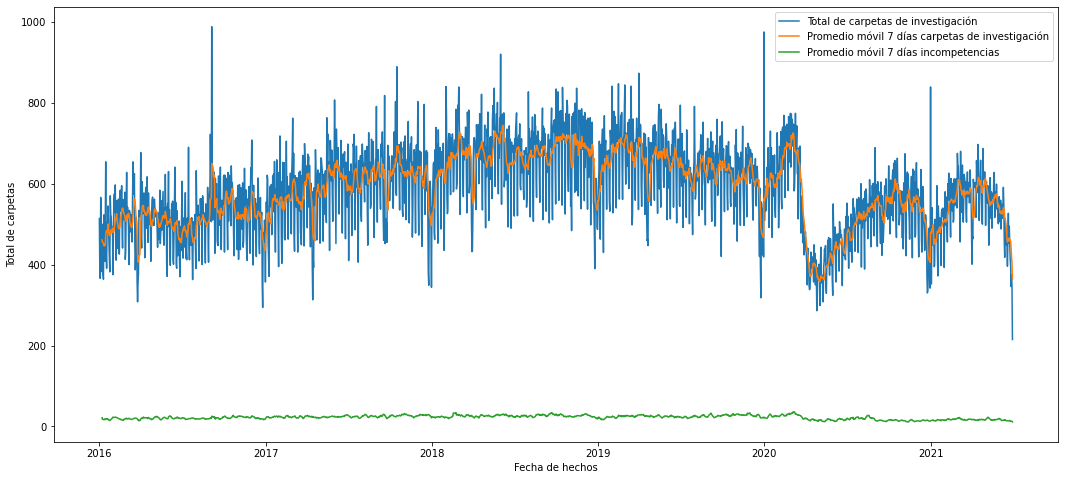

In [30]:
## hacer una gráfica de tendencia 

# fijar el tamaño de la figura
plt.figure( figsize = ( 18, 8))
  
# graficar una serie de tiempo usando seaborn.lineplot()
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'total_true',
             data = conteo,
             label = 'Total de carpetas de investigación')
  
# promedio_movil_true
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_true',
             data = conteo,
             label = 'Promedio móvil 7 días carpetas de investigación')
# promedio_movil_false
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_false',
             data = conteo,
             label = 'Promedio móvil 7 días incompetencias')

# fijar leyenda eje x 
plt.xlabel('Fecha de hechos')
  
#  fijar leyenda eje y
plt.ylabel('Total de carpetas')

Notamos de la gráfica que a pesar que hay algunos picos tanto a la bajo como al alza por lo que una medida como la media móvil de 7 días nos permite resumir el comportamiento de la tendencia de manera más clara. La tendencia ha ido al alza de manera más o menos estable desde el 2016, y se notan algunos factores de estacionalidad, como el hecho que hay una reducción en el total de carpetas cada fin de año. Se nota muy claramente el impacto de la pandemia de Covid-19 en la cantidad de delitos denunciados que iban al alza al inicio de 2020 para encontrarse con una bajada dramática. El promedio móvil de carpetas no ha regresado al nivel diario que tenía antes de la pandemia, a pesar de que la tendencia al alza ya se ha recuperado. 

Se incluyó el promedio móvil de incompetencias, que incorpora ambos criterios, y no se nota ni una diferencia al momento de cambiar los criterios (en septiembre de 2020) ni una tendencia clara de estos casos. La tendencia se aprecia estable de principio a fin.

Ahora que entendemos el contexto general del universo de carpetas de investigación de la FGJ, pasamos al análisis por delito para determinar qué delitos han subido y cuáles han bajado. Lo primero que usamos es el catálogo de delitos de la FGJ para clasificar la variable de delito. Esto tiene la ventaja de homologar esta variable en las categorías que usa tanto la FGJ como la ADIP para hacer sus reportes de delictividad. De esta manera concentramos el análisis en los delitos de alto impacto, que más afectan a la ciudadanía. Estos delitos son:

    - Homicidio doloso
    - Lesiones dolosas por disparo de arma de fuego
    - Robo a bordo de Metrobús
    - Robo a casa habitación con violencia
    - Robo a casa habitación sin violencia
    - Robo a conductor/pasajero de vehículo
    - Robo a cuentahabiente
    - Robo a negocio con violencia
    - Robo a pasajero a bordo de microbús
    - Robo a pasajero a bordo de taxi
    - Robo a pasajero a bordo del Metro
    - Robo a repartidor
    - Robo a transeúnte en vía pública
    - Robo a transportista
    - Robo de vehículo
    - Robo de vehículo con violencia
    - Robo de vehículo sin violencia
    - Secuestro
    - Secuestro Express
    - Violación

In [31]:
## clasificar por delitos y graficar

# para clasificar los delitos usamos el catálogo de delitos de la ADIP, mismo que es usado en el tablero público de seguridad (datosseguridad.cdmx.gob.mx) que se alimenta de esta misma base 
# leer catalogo de clasificaciones de delitos
cat_delitos_fgj = pd.read_csv('../input/cat_delitos_fgj.csv')

## hacemos un merge para pegar los códigos y etiquetas de delitos homologados
df = df.merge(cat_delitos_fgj,left_on = 'delito', right_on = 'delito_pgj')

In [32]:
# agrupar por fecha_hechos_clean y competencia y sumar sobre conteo
conteo = df.loc[df['inside_cdmx'] == True,].groupby(['fecha_hechos_clean','cve_delito'],as_index=False)['conteo'].sum()
## cortar el conteo a partir del 2015 para reducir la serie
conteo = conteo.loc[conteo['fecha_hechos_clean'] >= date(2018,1,1),]

Nota: es verdad hay que tener cuidado con los delitos de poca ocurrencia como lo son el secuestro y el secuestro express. Ya que hay días en que no se registra ninguna carpeta de investigación y por lo tanto no saldrán como observaciones en el conteo. Esto no representa un problema al hacer una gráfica de tendencia pero sí al calcular los promedios móviles ya que se tienen que considerar los días con cero obsevaciones. Es por esto que debemos hacer un procedimiento para asegurarnos que tenemos los días con cero delitos también en nuestro conteo. 

Para esto generamos primero la matriz con todas las combinaciones de fechas y delitos que estamos estudiando.

In [33]:
## generar matriz con todas las combinaciones

#función daterange que regresa todos los días entre dos fechas dadas
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)
lf = []

#vamos desde el 1 de enero de 2018 hasta la fecha máxima de los conteos en la lsita lf
start_dt = date(2018, 1, 1)
end_dt = max(conteo['fecha_hechos_clean'])
for dt in daterange(start_dt, end_dt):
    lf.append(dt.strftime("%Y-%m-%d"))
    
## hacemos una lista con los valores únicos de los delitos
ld =  cat_delitos_fgj.cve_delito.unique()

## calculamos las combinaciones de fechas y delitos
ltotal = [[i,j] for i in lf for j in ld]
# guardamos las fechas como un vector
date = [ltotal[i][0] for i in range(0,len(ltotal))]
# y los delitos correspondientes como otro
delitos = [ltotal[i][1] for i in range(0,len(ltotal))]
# se arma un df con estas dos variables que contiene todas las combinaciones de ambas
dfparcial =  pd.DataFrame({"fecha_hechos_clean":date,"cve_delito":delitos})



In [34]:
# convertir a tipo fecha para poder hacer el merge
dfparcial['fecha_hechos_clean'] = pd.to_datetime(dfparcial['fecha_hechos_clean'])
dfparcial['fecha_hechos_clean'] = dfparcial['fecha_hechos_clean'].apply(lambda x: x.date())

In [35]:
## hacemos merge con el conteo
conteo = dfparcial.merge(conteo, on = ['fecha_hechos_clean','cve_delito'],how = 'left')

In [36]:
## llenamos los días con valor nulo con cero
conteo['conteo'].fillna(0,inplace = True)

In [37]:
## cambiamos a formato largo para tratar a cada categoría de delito como una variable
conteo = conteo.pivot(index = 'fecha_hechos_clean',columns = 'cve_delito')
# quitar MultiIndex
conteo = conteo.reset_index(level=['fecha_hechos_clean'])
# renombrar columnas
conteo.columns = ['fecha_hechos_clean','total_homicidio','total_lesiones','total_metrobus',
                 'total_casa_con_violencia','total_casa_sin_violencia','total_conductor_pasajero','total_cuentahabiente',
                 'total_negocio','total_microbus','total_taxi','total_metro',
                 'total_repartidor','total_transeunte','total_transportista','total_vehiculo_con_violencia',
                 'total_vehiculo_sin_violencia','total_secuestro','total_secuestro_express','total_violacion'
                 ]

In [38]:
## calculamos las medias móviles a 7 días para todas las variables de totales
promedios_moviles = conteo.loc[:,['total_homicidio','total_lesiones','total_metrobus',
                 'total_casa_con_violencia','total_casa_sin_violencia','total_conductor_pasajero','total_cuentahabiente',
                 'total_negocio','total_microbus','total_taxi','total_metro',
                 'total_repartidor','total_transeunte','total_transportista','total_vehiculo_con_violencia',
                 'total_vehiculo_sin_violencia','total_secuestro','total_secuestro_express','total_violacion']].apply(lambda x: x.rolling( 7).mean(), 0)

In [39]:
# renombramos las columnas de manera apropiada
promedios_moviles.columns = ['promedio_movil_homicidio','promedio_movil_lesiones','promedio_movil_metrobus',
                 'promedio_movil_casa_con_violencia','promedio_movil_casa_sin_violencia','promedio_movil_conductor_pasajero','promedio_movil_cuentahabiente',
                 'promedio_movil_negocio','promedio_movil_microbus','promedio_movil_taxi','promedio_movil_metro',
                 'promedio_movil_repartidor','promedio_movil_transeunte','promedio_movil_transportista','promedio_movil_vehiculo_con_violencia',
                 'promedio_movil_vehiculo_sin_violencia','promedio_movil_secuestro','promedio_movil_secuestro_express','promedio_movil_violacion'
                 ]

In [40]:
# unimos los promedios móviles al conteo
conteo = pd.concat([conteo.reset_index(drop = True),promedios_moviles],axis = 1)

Text(0, 0.5, 'Total de carpetas')

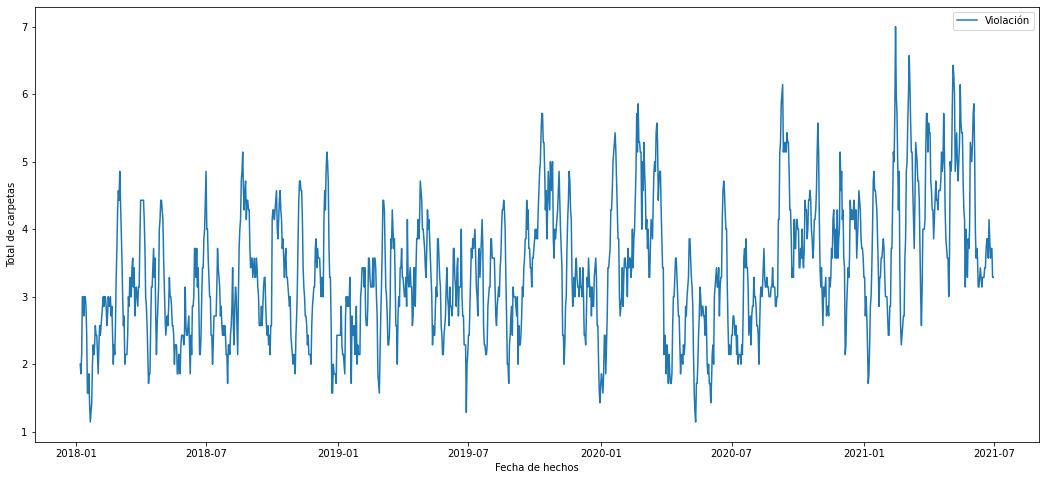

In [41]:
## hacer una gráfica de tendencia por delitos

# fijar el tamaño de la figura
plt.figure( figsize = ( 18, 8))
  
# promedio_movil_violacion
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_violacion',
             data = conteo,
             label = 'Violación')

# fijar leyenda eje x 
plt.xlabel('Fecha de hechos')
  
#  fijar leyenda eje y
plt.ylabel('Total de carpetas')

Obervamos que la tendencia en la violación se ha mantenido estable a lo largo del periodo estudiado. Se nota una bajada debida a la pandemia pero la tendencia se recupera de manera muy rápida y actualmente se encuentra en valores más altos que al inicio del periodo estudiado.

Text(0, 0.5, 'Total de carpetas')

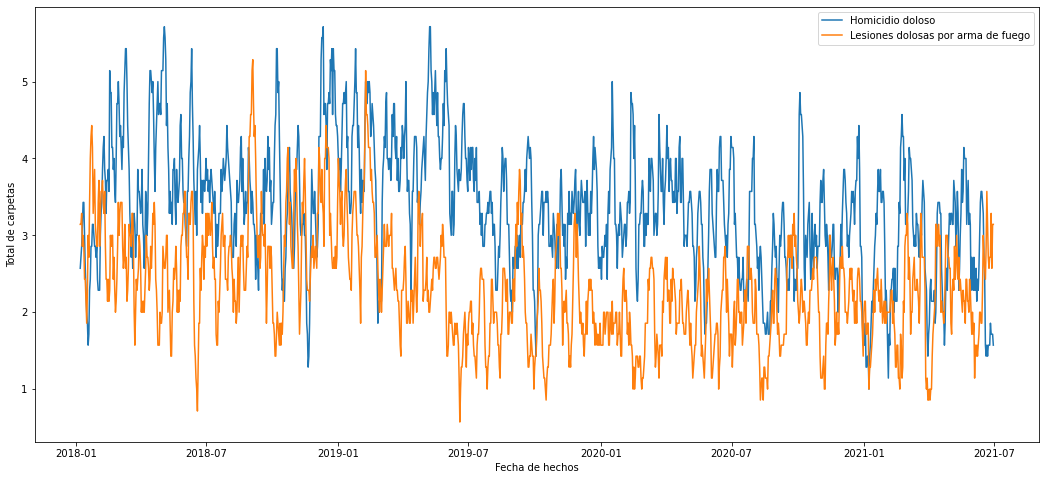

In [42]:
## hacer una gráfica de tendencia por delitos

# fijar el tamaño de la figura
plt.figure( figsize = ( 18, 8))
  
# promedio_movil_homicidio
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_homicidio',
             data = conteo,
             label = 'Homicidio doloso')
  
# promedio_movil_lesiones
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_lesiones',
             data = conteo,
             label = 'Lesiones dolosas por arma de fuego')

# fijar leyenda eje x 
plt.xlabel('Fecha de hechos')
  
#  fijar leyenda eje y
plt.ylabel('Total de carpetas')

En los delitos con mayor violencia física: el homicidio y las lesiones dolosas hay resultados similares. Hay una ligera disminución en la tendencia de las lesiones dolosas a partir del 2019. En el homicidio también se observa lo mismo pero de manera más débil.

Text(0, 0.5, 'Total de carpetas')

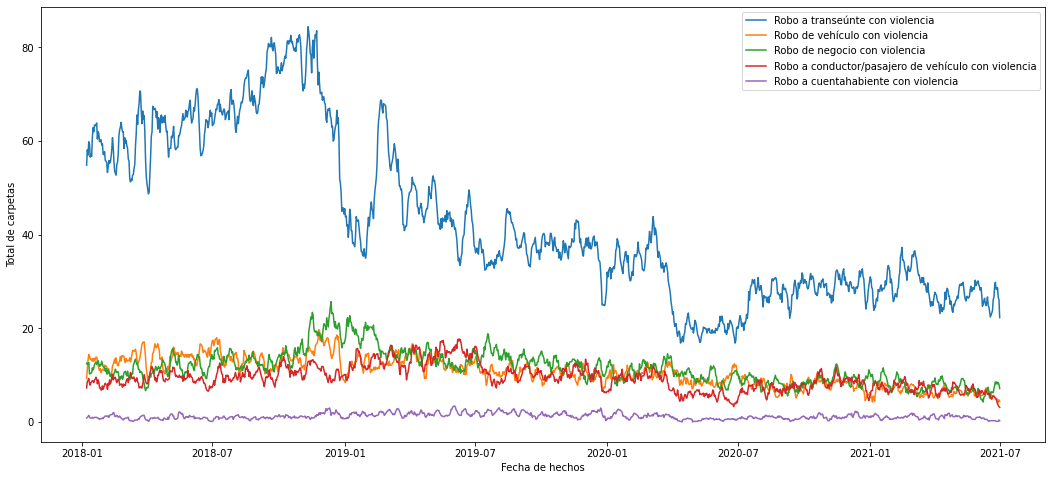

In [43]:
## hacer una gráfica de tendencia por delitos

# fijar el tamaño de la figura
plt.figure( figsize = ( 18, 8))
  
# promedio_movil_transeunte
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_transeunte',
             data = conteo,
             label = 'Robo a transeúnte con violencia')
# promedio_movil_vehiculo_con_violencia
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_vehiculo_con_violencia',
             data = conteo,
             label = 'Robo de vehículo con violencia')
# promedio_movil_negocio
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_negocio',
             data = conteo,
             label = 'Robo de negocio con violencia')

# promedio_movil_conductor_pasajero
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_conductor_pasajero',
             data = conteo,
             label = 'Robo a conductor/pasajero de vehículo con violencia')

# promedio_movil_cuentahabiente
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_cuentahabiente',
             data = conteo,
             label = 'Robo a cuentahabiente con violencia')


# fijar leyenda eje x 
plt.xlabel('Fecha de hechos')
  
#  fijar leyenda eje y
plt.ylabel('Total de carpetas')

En los delitos que suceden en la vía pública con violencia hay resultados mixtos. Por un lado el robo a transeúnte con violencia muestra una clara tendencia a la baja que se ha sostenido desde el 2019. La pandemia aceleró esta dismunución pero a partir del verano de 2020 esta se estabilizó. El robo a negocio con violencia tuvo un ligero pico alrededor del inicio del 2019 pero se ha mantenido estable desde entonces. Mientras que el robo a vehículo con violencia, el robo a conductor/pasajero de vehículo con violencia y el robo a cuentahabiente con violencia no muestran una tendencia clara al alza o bajo sino que están estables a lo largo del periodo.

Text(0, 0.5, 'Total de carpetas')

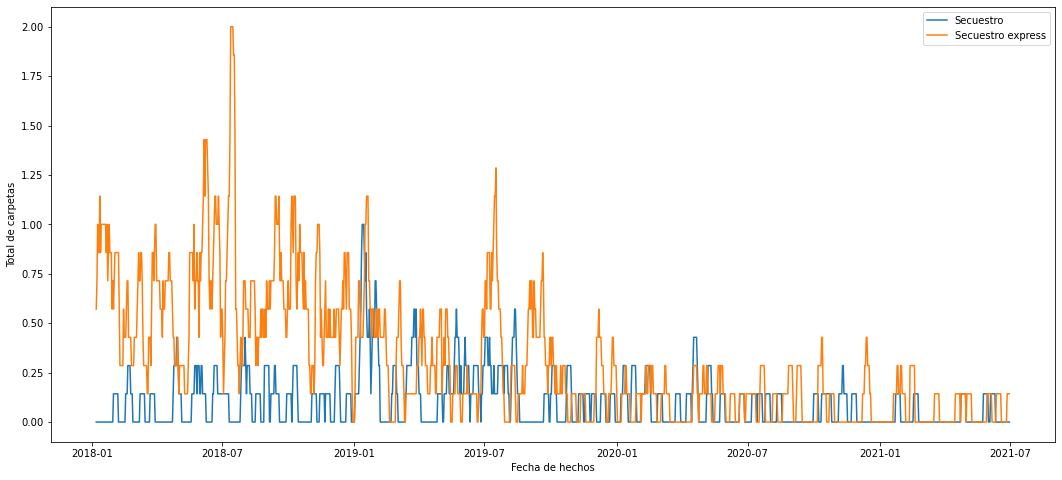

In [44]:
## hacer una gráfica de tendencia por delitos

# fijar el tamaño de la figura
plt.figure( figsize = ( 18, 8))
  

# promedio_movil_secuestro
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_secuestro',
             data = conteo,
             label = 'Secuestro')

# promedio_movil_secuestro_express
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_secuestro_express',
             data = conteo,
             label = 'Secuestro express')

# fijar leyenda eje x 
plt.xlabel('Fecha de hechos')
  
#  fijar leyenda eje y
plt.ylabel('Total de carpetas')

El secuestro y el secuestro express presentan mucha variabilidad derivado de que hay muy pocas observaciones de estos delitos. Se nota una ligera tendencia a la baja en el secuestro express mientras que el secuestro se mantiene estable después de un ligero pico alrededor del inicio de 2019.

Text(0, 0.5, 'Total de carpetas')

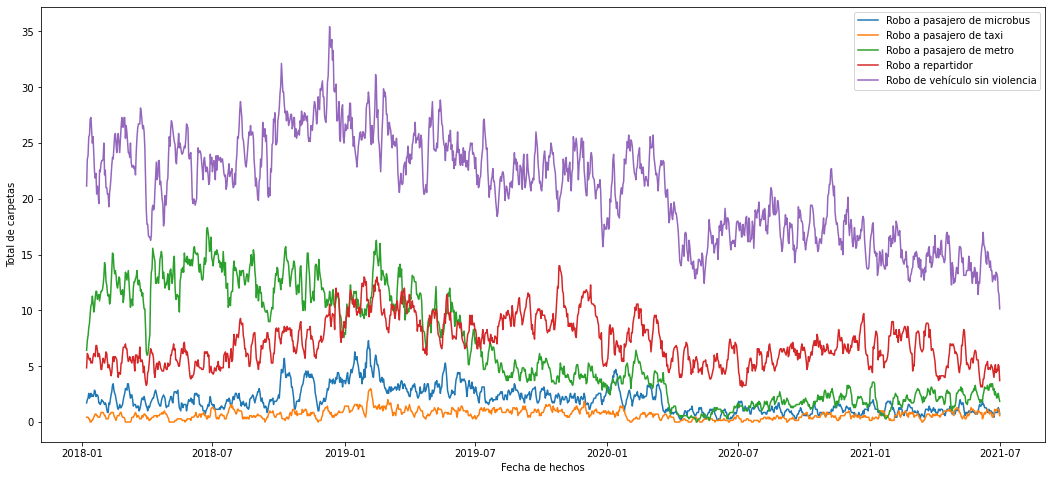

In [45]:
## hacer una gráfica de tendencia por delitos

# fijar el tamaño de la figura
plt.figure( figsize = ( 18, 8))
  
# promedio_movil_microbus
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_microbus',
             data = conteo,
             label = 'Robo a pasajero de microbus')
# promedio_movil_taxi
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_taxi',
             data = conteo,
             label = 'Robo a pasajero de taxi')
# promedio_movil_metro
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_metro',
             data = conteo,
             label = 'Robo a pasajero de metro')
# promedio_movil_repartidor
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_repartidor',
             data = conteo,
             label = 'Robo a repartidor')

# promedio_movil_vehiculo_sin_violencia
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_vehiculo_sin_violencia',
             data = conteo,
             label = 'Robo de vehículo sin violencia')


# fijar leyenda eje x 
plt.xlabel('Fecha de hechos')
  
#  fijar leyenda eje y
plt.ylabel('Total de carpetas')

En los delitos centrados alrededor del transporte público, más el robo de vehículo sin violencia también hay resultados mixtos. Los delitos de robo a pasajero a bordo de taxi, robo a pasajero de microbús y robo a repartidor hay algunos altos y bajos pero la tendencia es estable a lo largo del periodo. En el robo de vehículo sin violencia se nota una ligera tendencia a la baja, misma que se ha recuperado a su nivel normal después de acelerarse durante la pandemia. De manera similar se comporta el robo a pasajero de metro, que muestra una tendencia a la baja que se ha estabilizado a partir del inicio de la pandemia.

3.3 ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos? ¿Por qué crees que sea
esto?

Para contestar la pregunta comenzamos por calcular el total de delitos de alto impacto por alcaldía para tener una sola métrica que nos indice cómo se comporta la suma de este conjunto de delitos. Hacemos una gráfica del promedio móvil de siete días de este indicador para cada alcaldía.

In [59]:
# filtrar solo delitos de alto impacto, agrupar por fecha_hechos_clean y competencia y sumar sobre conteo
conteo = df.loc[(~pd.isnull(df['cve_delito'])) & (df['inside_cdmx'] == True) & (df['alcaldia_hechos'] != 'ECATEPEC DE MORELOS'),].groupby(['fecha_hechos_clean','alcaldia_hechos'],as_index=False)['conteo'].sum()
## cortar el conteo a partir del 2018 para reducir la serie
conteo = conteo.loc[conteo['fecha_hechos_clean'] >= date(2018,1,1),]

In [60]:
## cambiamos a formato largo para tratar a cada categoría de delito como una variable
conteo = conteo.pivot(index = 'fecha_hechos_clean',columns = 'alcaldia_hechos')
# quitar MultiIndex
conteo = conteo.reset_index(level=['fecha_hechos_clean'])


In [63]:
conteo.columns

MultiIndex([('fecha_hechos_clean',                       ''),
            (            'conteo',         'ALVARO OBREGON'),
            (            'conteo',           'AZCAPOTZALCO'),
            (            'conteo',          'BENITO JUAREZ'),
            (            'conteo',               'COYOACAN'),
            (            'conteo',  'CUAJIMALPA DE MORELOS'),
            (            'conteo',             'CUAUHTEMOC'),
            (            'conteo',       'GUSTAVO A MADERO'),
            (            'conteo',              'IZTACALCO'),
            (            'conteo',             'IZTAPALAPA'),
            (            'conteo', 'LA MAGDALENA CONTRERAS'),
            (            'conteo',         'MIGUEL HIDALGO'),
            (            'conteo',             'MILPA ALTA'),
            (            'conteo',                'TLAHUAC'),
            (            'conteo',                'TLALPAN'),
            (            'conteo',    'VENUSTIANO CARRANZA'),
        

In [64]:
# renombrar columnas
conteo.columns = ['fecha_hechos_clean','total_alvaro_obregon','total_azcapotzalco','total_benito_juarez','total_coyoacan',
                 'total_cuajimalpa','total_cuauhtemoc','total_gustavo_a_madero','total_iztacalco','total_iztapalapa',
                 'total_magdalena_contreras','total_miguel_hidalgo','total_milpa_alta','total_tlahuac',
                 'total_tlalpan','total_venustiano_carranza','total_xochimilco'
                 ]

In [67]:
## llenar valores nulos con ceros
conteo.fillna(0,inplace = True)

In [69]:
## calculamos las medias móviles a 7 días para todas las variables de totales
promedios_moviles = conteo.loc[:,['total_alvaro_obregon','total_azcapotzalco','total_benito_juarez','total_coyoacan',
                 'total_cuajimalpa','total_cuauhtemoc','total_gustavo_a_madero','total_iztacalco','total_iztapalapa',
                 'total_magdalena_contreras','total_miguel_hidalgo','total_milpa_alta','total_tlahuac',
                 'total_tlalpan','total_venustiano_carranza','total_xochimilco']].apply(lambda x: x.rolling( 7).mean(), 0)

# renombramos las columnas de manera apropiada
promedios_moviles.columns = ['promedio_movil_alvaro_obregon','promedio_movil_azcapotzalco','promedio_movil_benito_juarez','promedio_movil_coyoacan',
                 'promedio_movil_cuajimalpa','promedio_movil_cuauhtemoc','promedio_movil_gustavo_a_madero','promedio_movil_iztacalco','promedio_movil_iztapalapa',
                 'promedio_movil_magdalena_contreras','promedio_movil_miguel_hidalgo','promedio_movil_milpa_alta','promedio_movil_tlahuac',
                 'promedio_movil_tlalpan','promedio_movil_venustiano_carranza','promedio_movil_xochimilco'
                 ]

In [70]:
# unimos los promedios móviles al conteo
conteo = pd.concat([conteo.reset_index(drop = True),promedios_moviles],axis = 1)

In [72]:
conteo.columns

Index(['fecha_hechos_clean', 'total_alvaro_obregon', 'total_azcapotzalco',
       'total_benito_juarez', 'total_coyoacan', 'total_cuajimalpa',
       'total_cuauhtemoc', 'total_gustavo_a_madero', 'total_iztacalco',
       'total_iztapalapa', 'total_magdalena_contreras', 'total_miguel_hidalgo',
       'total_milpa_alta', 'total_tlahuac', 'total_tlalpan',
       'total_venustiano_carranza', 'total_xochimilco',
       'promedio_movil_alvaro_obregon', 'promedio_movil_azcapotzalco',
       'promedio_movil_benito_juarez', 'promedio_movil_coyoacan',
       'promedio_movil_cuajimalpa', 'promedio_movil_cuauhtemoc',
       'promedio_movil_gustavo_a_madero', 'promedio_movil_iztacalco',
       'promedio_movil_iztapalapa', 'promedio_movil_magdalena_contreras',
       'promedio_movil_miguel_hidalgo', 'promedio_movil_milpa_alta',
       'promedio_movil_tlahuac', 'promedio_movil_tlalpan',
       'promedio_movil_venustiano_carranza', 'promedio_movil_xochimilco'],
      dtype='object')

Text(0, 0.5, 'Total de carpetas')

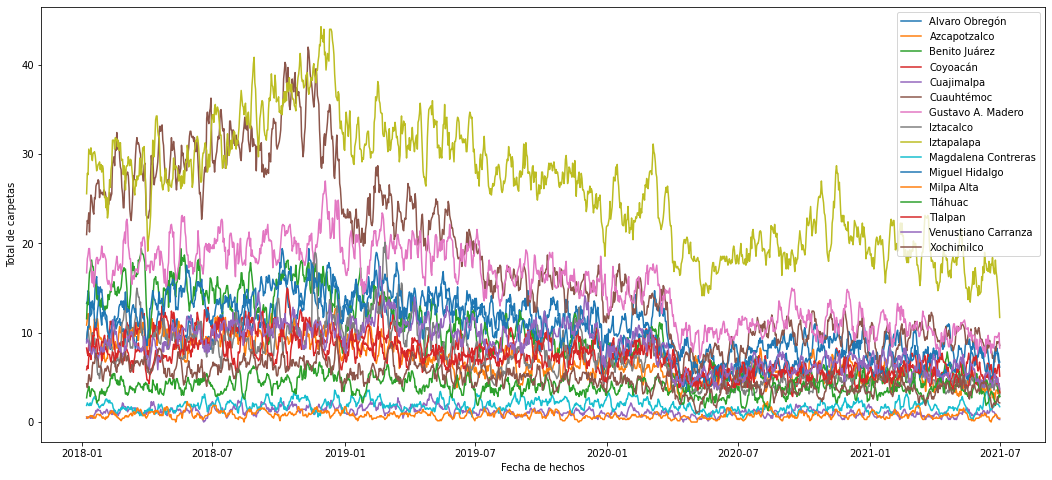

In [77]:
## hacer una gráfica de tendencia por dalcaldias

# fijar el tamaño de la figura
plt.figure( figsize = ( 18, 8))
  
# promedio_movil_alvaro_obregon
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_alvaro_obregon',
             data = conteo,
             label = 'Alvaro Obregón')
# promedio_movil_azcapotzalco
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_azcapotzalco',
             data = conteo,
             label = 'Azcapotzalco')
# promedio_movil_benito_juarez
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_benito_juarez',
             data = conteo,
             label = 'Benito Juárez')
# promedio_movil_coyoacan
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_coyoacan',
             data = conteo,
             label = 'Coyoacán')
# promedio_movil_cuajimalpa
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_cuajimalpa',
             data = conteo,
             label = 'Cuajimalpa')
# promedio_movil_cuauhtemoc
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_cuauhtemoc',
             data = conteo,
             label = 'Cuauhtémoc')
# promedio_movil_gustavo_a_madero
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_gustavo_a_madero',
             data = conteo,
             label = 'Gustavo A. Madero')
# promedio_movil_iztacalco
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_iztacalco',
             data = conteo,
             label = 'Iztacalco')
# promedio_movil_iztapalapa
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_iztapalapa',
             data = conteo,
             label = 'Iztapalapa')
# promedio_movil_magdalena_contreras
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_magdalena_contreras',
             data = conteo,
             label = 'Magdalena Contreras')
# promedio_movil_miguel_hidalgo
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_miguel_hidalgo',
             data = conteo,
             label = 'Miguel Hidalgo')
# promedio_movil_milpa_alta
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_milpa_alta',
             data = conteo,
             label = 'Milpa Alta')
# promedio_movil_tlahuac
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_tlahuac',
             data = conteo,
             label = 'Tláhuac')
# promedio_movil_tlalpan
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_tlalpan',
             data = conteo,
             label = 'Tlalpan')
# promedio_movil_venustiano_carranza
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_venustiano_carranza',
             data = conteo,
             label = 'Venustiano Carranza')
# promedio_movil_xochimilco
sns.lineplot( x = 'fecha_hechos_clean',
             y = 'promedio_movil_xochimilco',
             data = conteo,
             label = 'Xochimilco')


# fijar leyenda eje x 
plt.xlabel('Fecha de hechos')
  
#  fijar leyenda eje y
plt.ylabel('Total de carpetas')

Notamos varias cosas de la gráfica. Primero que Iztapalapa se mantiene por encima del resto de las alcaldías en casi todo momento, especialmente a partir de enero de 2019. Solo es superada por Cuauhtémoc en algunos momentos antes del inicio del 2019. 

Hay que notar que la cantidad de delitos se correlaciona positivamente con la cantidad de población. Y en efecto la alcaldía con más delitos es también la más poblada. Si dividimos la ocurrencia anual de delitos entre la población de cada alcaldía, podemos obtener la tasa de delitos por cien mil habitantes. Esta es una medida ponderada por la población por lo que nos ofrece una manera de visualizar si las alcaldías tienen más o menos delitos controlando por su cantidad de habitantes.

3.4 ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la
semana, quincenas) en la CDMX? ¿A qué crees que se deba?

Calculamos una serie de variables a partir de la fecha y hora de hechos para responder la pregunta.

In [79]:
## tirar observaciones sin fecha de hechos
df = df.loc[~pd.isnull(df['fecha_hechos_clean']),]

In [89]:
# calcular día de la semana
df['dia_semana'] = df['fecha_hechos_clean'].apply(lambda x: int(x.strftime('%w')))
## calcular el día del mes
df['dia_mes'] = df['fecha_hechos_clean'].apply(lambda x: int(x.strftime('%-d')))

Calculamos el total de delitos por día de la semana

In [90]:
# filtrar solo delitos de alto impacto después del 2018, agrupar por dia_semana y sumar sobre conteo
conteo = df.loc[(~pd.isnull(df['cve_delito'])) & (df['inside_cdmx'] == True) & (df['fecha_hechos_clean'] >= date(2018,1,1)),].groupby(['dia_semana'],as_index=False)['conteo'].sum()


In [91]:
conteo

,dia_semana,conteo
0,0,20318
1,1,26169
2,2,26326
3,3,27139
4,4,26979
5,5,28089
6,6,24630


Es notable que el domingo (día 0) hay una reducción notable de los delitos. De hecho estos van al alza conforme avanza la semana de lunes a viernes, luego disminuyen el sábado y aún más el domingo. Aprovechamos aquí usar la fecha de hechos reportada por lo que no hay ningún sesgo a partir del día en que se hace la denuncia. Recordemos que el delito corresponde a la oportunidad por lo que la movilidad reducida de los fines de semana puede ser parte de la explicación.

Ahora calculamos el mismo conteo por día del mes.

In [92]:
# filtrar solo delitos de alto impacto después del 2018, agrupar por dia_semana y sumar sobre conteo
conteo = df.loc[(~pd.isnull(df['cve_delito'])) & (df['inside_cdmx'] == True) & (df['fecha_hechos_clean'] >= date(2018,1,1)),].groupby(['dia_mes'],as_index=False)['conteo'].sum()


In [94]:
conteo

,dia_mes,conteo
0,1,5808
1,2,5773
2,3,5916
3,4,6101
4,5,6197
5,6,5790
6,7,5985
7,8,6001
8,9,5861
9,10,6003


In [93]:
conteo.sort_values('dia_mes')

,dia_mes,conteo
0,1,5808
1,2,5773
2,3,5916
3,4,6101
4,5,6197
5,6,5790
6,7,5985
7,8,6001
8,9,5861
9,10,6003


3.5 ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que
suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

3.6 Diseña un indicador que mida el nivel de “inseguridad”. Genéralo al nivel de
desagregación que te parezca más adecuado (ej.manzana,calle,AGEB,etc.). Analiza los
resultados ¿Encontraste algún patrón interesante? ¿Qué decisiones se podrían tomar
con el indicador?